<a href="https://colab.research.google.com/github/cppel/data/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%E2%84%9612_%D0%9F%D1%80%D0%B8%D0%BC%D0%B5%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BC%D0%B5%D1%82%D0%BE%D0%B4%D0%BE%D0%B2_%D0%BC%D0%B0%D1%88%D0%B8%D0%BD%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BE%D0%B1%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B4%D0%BB%D1%8F_%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 0. Найдите в глобальной сети или соберите свой датасет для классификации текстов (Пример: новости -> рубрики, комментарии в соц. сетях -> характер, )

* Количество классов в датасете должно превышать 2
* Язык текста в датасете: русский

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

## Загрузите датасет

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/task12/ecommerceDataset.csv', header = None)
df.columns = ['category', 'product_description']
df.head()

,category,product_description
0,Household,Paper Plane Design Framed Wall Hanging Motivat...
1,Household,"SAF 'Floral' Framed Painting (Wood, 30 inch x ..."
2,Household,SAF 'UV Textured Modern Art Print Framed' Pain...
3,Household,"SAF Flower Print Framed Painting (Synthetic, 1..."
4,Household,Incredible Gifts India Wooden Happy Birthday U...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50425 entries, 0 to 50424
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             50425 non-null  object
 1   product_description  50424 non-null  object
dtypes: object(2)
memory usage: 788.0+ KB


In [7]:
df.dropna(inplace= True)

In [8]:
df.describe()

,category,product_description
count,50424,50424
unique,4,27802
top,Household,Think & Grow Rich About the Author NAPOLEON HI...
freq,19313,30


In [9]:
df.product_description.mode()[0]

'Think & Grow Rich About the Author NAPOLEON HILL, born in Pound, Southwest Virginia in 1883, was a very successful American author in the area of the new thought movement—one of the earliest producers of the modern genre of personal-success literature. He is widely considered to be one of the great writers on success. The turning point in Hill’s life occurred in the year 1908 when he interviewed the industrialist Andrew Carnegie—one of the most powerful men in the world at that time, as part of an assignment—an interview which ultimately led to the publication of Think and Grow Rich, one of his best-selling books of all time. the book examines the power of personal beliefs and the role they play in personal success. Hill, who had even served as the advisor to President Franklin D. Roosevelt from 1933-36, passed away at the age of 87.'

In [10]:
df[df.product_description == df.product_description.mode()[0]]

,category,product_description
19466,Books,Think & Grow Rich About the Author NAPOLEON HI...
19766,Books,Think & Grow Rich About the Author NAPOLEON HI...
20158,Books,Think & Grow Rich About the Author NAPOLEON HI...
20834,Books,Think & Grow Rich About the Author NAPOLEON HI...
21186,Books,Think & Grow Rich About the Author NAPOLEON HI...
24479,Books,Think & Grow Rich About the Author NAPOLEON HI...
24481,Books,Think & Grow Rich About the Author NAPOLEON HI...
24499,Books,Think & Grow Rich About the Author NAPOLEON HI...
26047,Books,Think & Grow Rich About the Author NAPOLEON HI...
26164,Books,Think & Grow Rich About the Author NAPOLEON HI...


In [11]:
df.duplicated(subset='product_description').sum()

22622

In [12]:
df.drop_duplicates(subset='product_description', keep='first', inplace=True)

In [13]:
df.shape

(27802, 2)

<Axes: xlabel='category', ylabel='count'>

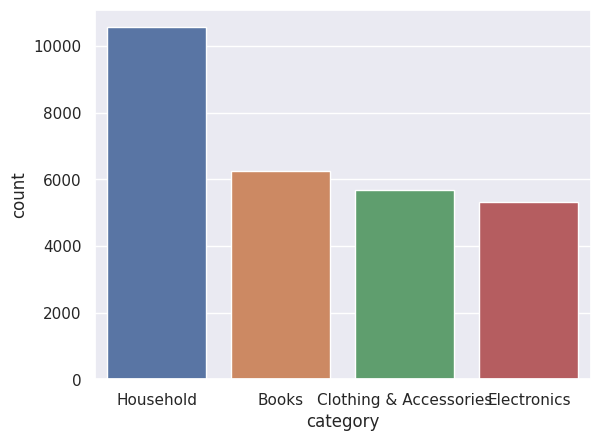

In [14]:
import seaborn as sns
sns.set(style='darkgrid')
sns.countplot(x='category', data=df, order= df.category.value_counts().index)

In [15]:
X = df['product_description']
y = df['category']

## Разделите данные на обучающую и валидационную выборки

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## При выполении дальнейших заданий поэксперементируйте с методами векторизации текста:


1. [Bag of Words](https://habr.com/ru/companies/mlclass/articles/270591/) (BOW): Bag of Words представляет текст как вектор, где каждый элемент обозначает количество вхождений конкретного слова в тексте. Процесс включает в себя создание словаря всех уникальных слов в корпусе текстов и подсчет частоты встречаемости каждого слова в отдельных текстах.

2. [TF-IDF](https://habr.com/ru/companies/otus/articles/755772/) (Term Frequency-Inverse Document Frequency): TF-IDF учитывает не только количество вхождений слова в текст, но и частоту его встречаемости в других текстах. Он вычисляет вес слова, умножая его частоту встречаемости (term frequency) на обратную частоту документа (inverse document frequency). Это позволяет снизить вес наиболее часто встречающихся слов, которые могут быть менее информативными.

3. Word Embeddings (например, [Word2Vec](https://habr.com/ru/articles/446530/) и [GloVe](https://jonathan-hui.medium.com/nlp-word-embedding-glove-5e7f523999f6)): Word Embeddings используют нейронные сети для создания векторных представлений слов, которые учитывают семантическую близость между словами. Нейронные сети обучаются на больших текстовых корпусах и захватывают семантические отношения между словами, что позволяет представить слова в векторном пространстве.

4. One-Hot Encoding: One-Hot Encoding преобразует каждое слово в уникальный вектор, где все элементы равны нулю, за исключением одного, который равен единице. Каждый вектор соответствует отдельному слову и используется для представления его в пространстве признаков.

5. [Count Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html): Count Vectorizer подсчитывает количество раз, которое каждое слово встречается в тексте. Он создает вектор, в котором каждый элемент соответствует количеству вхождений конкретного слова в текст.

6. [Hashing Vectorizer](https://kavita-ganesan.com/hashingvectorizer-vs-countvectorizer/): Hashing Vectorizer преобразует каждое слово в уникальный числовой идентификатор с помощью хеширования. Он использует хеш-функцию для преобразования слова в числовое значение, которое затем используется в векторном представлении.

7. [Doc2Vec](https://habr.com/ru/articles/599513/): Doc2Vec является расширением метода Word2Vec и позволяет получить векторное представление не только отдельных слов, но и целых документов или текстов. Алгоритм обучает нейронную сеть, которая учитывает контекст и порядок слов в предложении, чтобы получить векторное представление документа. Это позволяет сравнивать и измерять семантическую близость между целыми текстовыми документами.

# Задание 1. Обучите модель классификатора Naive Bayes для решения поставленной задачи

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [18]:
clf_NaiveBaised = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [19]:
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [20]:
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [21]:
conf_mat_NB=confusion_matrix(y_test, y_pred_NB)

## Вывод матрицы ошибок:

<Axes: >

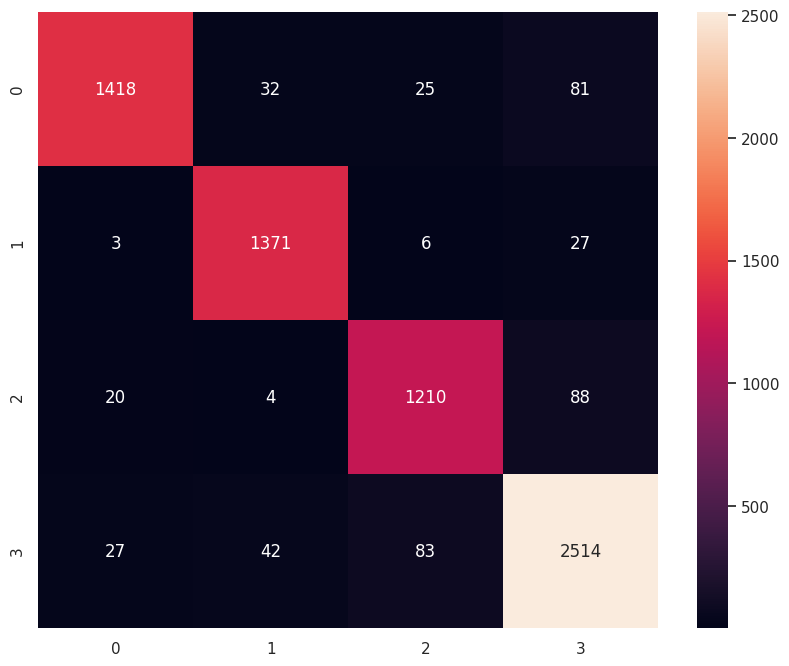

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

## Оценка точности:

In [23]:
print(classification_report(y_test, y_pred_NB))

                        precision    recall  f1-score   support

                 Books       0.97      0.91      0.94      1556
Clothing & Accessories       0.95      0.97      0.96      1407
           Electronics       0.91      0.92      0.91      1322
             Household       0.93      0.94      0.94      2666

              accuracy                           0.94      6951
             macro avg       0.94      0.94      0.94      6951
          weighted avg       0.94      0.94      0.94      6951



# Задание 2. Обучите модель SVM (метод опорных векторов) для решения поставленной задачи

In [24]:
clf_svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf", C=1000, gamma=0.001))
])

In [25]:
clf_svm.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [26]:
y_pred_SVM = clf_svm.predict(X_test)

## Вывод матрицы ошибок:

In [27]:
conf_mat_SVM = confusion_matrix(y_test, y_pred_SVM)

<Axes: >

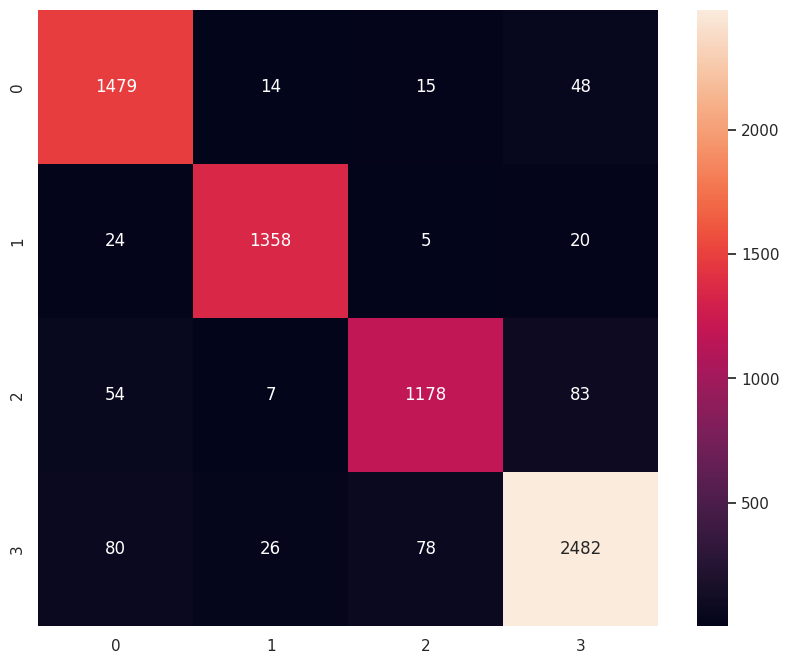

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_SVM, annot=True, fmt='d')

## Оценка точности:

In [29]:
print(classification_report(y_test, y_pred_SVM))

                        precision    recall  f1-score   support

                 Books       0.90      0.95      0.93      1556
Clothing & Accessories       0.97      0.97      0.97      1407
           Electronics       0.92      0.89      0.91      1322
             Household       0.94      0.93      0.94      2666

              accuracy                           0.93      6951
             macro avg       0.93      0.93      0.93      6951
          weighted avg       0.94      0.93      0.93      6951



# Задание 3. Обучите модель классификатора Decision Tree Classifier для решения поставленной задачи

In [30]:
clf_DecisionTree = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt', DecisionTreeClassifier())
])

In [31]:
clf_DecisionTree.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [32]:
y_pred_DT = clf_DecisionTree.predict(X_test)

## Вывод матрицы ошибок:

In [33]:
conf_mat_DT=confusion_matrix(y_test, y_pred_DT)

<Axes: >

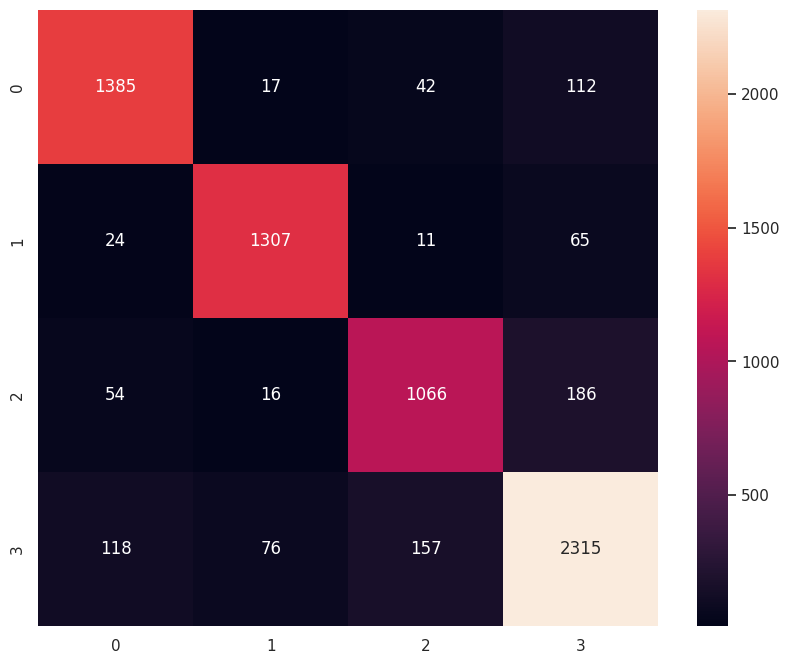

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_DT,annot=True,fmt='d')

## Оценка точности:

In [35]:
print(classification_report(y_test, y_pred_DT))

                        precision    recall  f1-score   support

                 Books       0.88      0.89      0.88      1556
Clothing & Accessories       0.92      0.93      0.93      1407
           Electronics       0.84      0.81      0.82      1322
             Household       0.86      0.87      0.87      2666

              accuracy                           0.87      6951
             macro avg       0.87      0.87      0.87      6951
          weighted avg       0.87      0.87      0.87      6951



# Задание 4. Обучите модель классификатора Random Forest Classifier для решения поставленной задачи

In [36]:
clf_rf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [37]:
clf_rf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [38]:
y_pred_RF = clf_rf.predict(X_test)

## Вывод матрицы ошибок:

In [39]:
conf_mat_RF=confusion_matrix(y_test, y_pred_RF)

<Axes: >

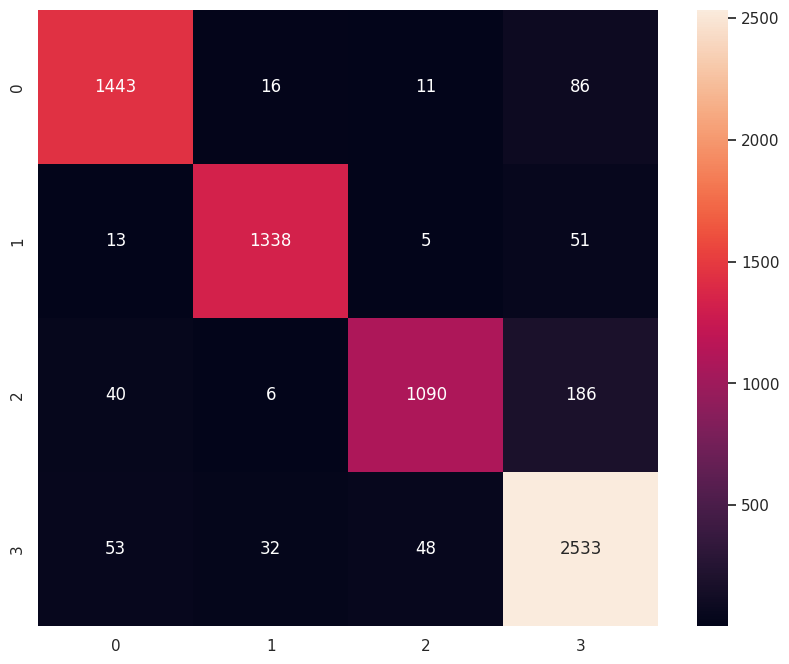

In [40]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_RF,annot=True,fmt='d')

## Оценка точности:

In [41]:
print(classification_report(y_test, y_pred_RF))

                        precision    recall  f1-score   support

                 Books       0.93      0.93      0.93      1556
Clothing & Accessories       0.96      0.95      0.96      1407
           Electronics       0.94      0.82      0.88      1322
             Household       0.89      0.95      0.92      2666

              accuracy                           0.92      6951
             macro avg       0.93      0.91      0.92      6951
          weighted avg       0.92      0.92      0.92      6951



# Задание 5. Обучите модели машинного обучения для решения задачи классификации текстов, используя следующие boosting-алгоритмы: CatBoost, Light GBM, XGBoost, AdaBoost. Сравните их точность и быстродействие.

In [43]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 3.2 MB/s eta 0:00:00


In [44]:
from time import time
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [46]:
accuracy = {}
training_time = {}
prediction_time = {}

## 5.1. CatBoost

In [47]:
catboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('catboost', CatBoostClassifier(random_state=33))
])

In [48]:
start_time = time()
catboost_model.fit(X_train, y_train_enc)
training_time['CatBoost'] = time() - start_time

Learning rate set to 0.092384
0:	learn: 1.2950974	total: 1.94s	remaining: 32m 18s
1:	learn: 1.2169808	total: 3.15s	remaining: 26m 14s
2:	learn: 1.1489825	total: 4.35s	remaining: 24m 6s
3:	learn: 1.0964426	total: 5.71s	remaining: 23m 40s
4:	learn: 1.0542220	total: 6.92s	remaining: 22m 57s
5:	learn: 1.0123384	total: 8.11s	remaining: 22m 22s
6:	learn: 0.9800117	total: 9.9s	remaining: 23m 24s
7:	learn: 0.9498591	total: 11.9s	remaining: 24m 30s
8:	learn: 0.9241588	total: 13.9s	remaining: 25m 26s
9:	learn: 0.9011651	total: 15.9s	remaining: 26m 12s
10:	learn: 0.8813939	total: 17.1s	remaining: 25m 34s
11:	learn: 0.8639191	total: 18.2s	remaining: 25m
12:	learn: 0.8464910	total: 19.4s	remaining: 24m 35s
13:	learn: 0.8311632	total: 20.6s	remaining: 24m 9s
14:	learn: 0.8167688	total: 21.8s	remaining: 23m 51s
15:	learn: 0.8011896	total: 23.2s	remaining: 23m 43s
16:	learn: 0.7878449	total: 24.4s	remaining: 23m 29s
17:	learn: 0.7739107	total: 25.7s	remaining: 23m 22s
18:	learn: 0.7620688	total: 27.5s

In [49]:
start_time = time()
y_pred_Cat = catboost_model.predict(X_test)
prediction_time['CatBoost'] = time() - start_time

<Axes: >

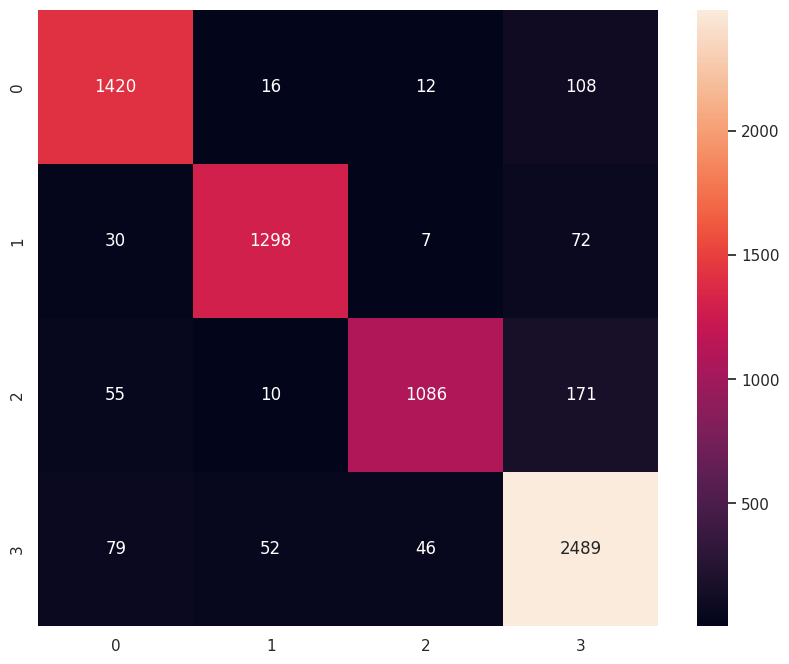

In [50]:
conf_mat_Cat = confusion_matrix(y_test_enc, y_pred_Cat)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_Cat, annot=True, fmt='d')

In [51]:
acc = accuracy_score(y_test_enc, y_pred_Cat)
accuracy['CatBoost'] = acc
acc

0.905337361530715

## 5.2. Light GBM

In [52]:
lgbm_model = Pipeline([
    ('vectorizer', CountVectorizer(dtype=np.float32)),
    ('lgbm', LGBMClassifier(random_state=33))
])

In [53]:
start_time = time()
lgbm_model.fit(X_train, y_train_enc)
training_time['LGBM'] = time() - start_time

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 2.126372 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 34142
[LightGBM] [Info] Number of data points in the train set: 20851, number of used features: 7527
[LightGBM] [Info] Start training from score -1.489839
[LightGBM] [Info] Start training from score -1.586491
[LightGBM] [Info] Start training from score -1.654614
[LightGBM] [Info] Start training from score -0.970792


In [54]:
start_time = time()
y_pred_LGBM = lgbm_model.predict(X_test)
prediction_time['LGBM'] = time() - start_time

<Axes: >

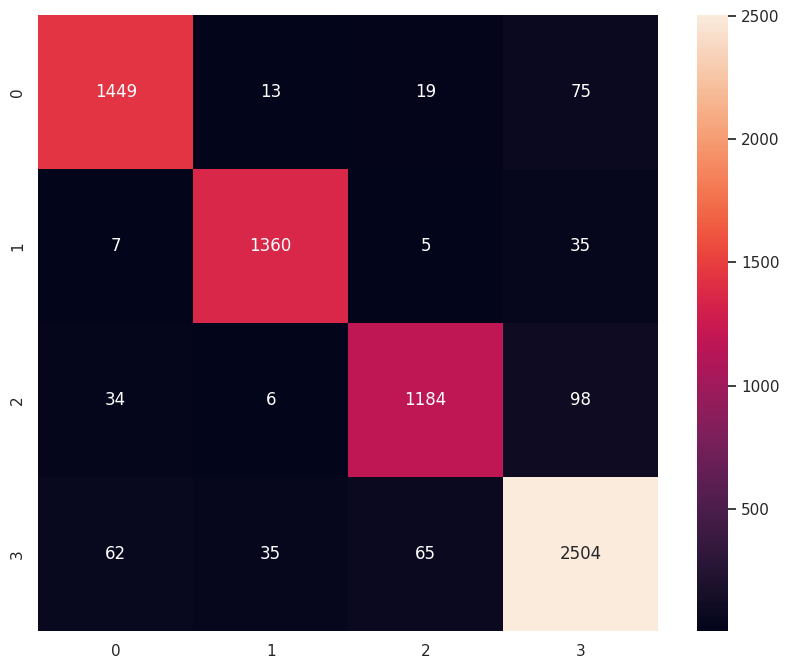

In [55]:
conf_mat_LGBM = confusion_matrix(y_test_enc, y_pred_LGBM)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_LGBM, annot=True, fmt='d')

In [56]:
acc = accuracy_score(y_test_enc, y_pred_LGBM)
accuracy['LGBM'] = acc
acc

0.9346856567400375

## 5.3. XGBoost

In [57]:
xgboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('xgboost', XGBClassifier(random_state=33))
])

In [58]:
start_time = time()
xgboost_model.fit(X_train, y_train_enc)
training_time['XGBoost'] = time() - start_time

In [59]:
start_time = time()
y_pred_XG = xgboost_model.predict(X_test)
prediction_time['XGBoost'] = time() - start_time

<Axes: >

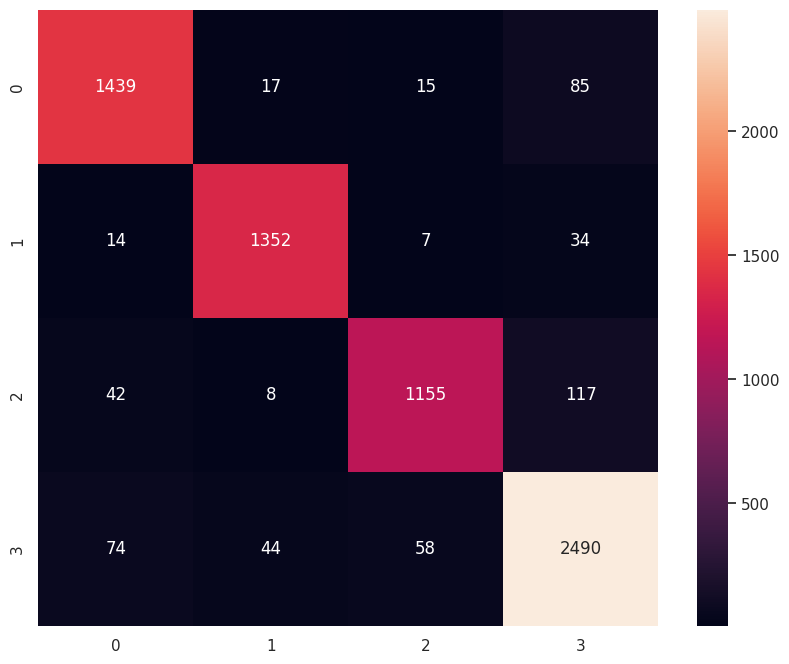

In [60]:
conf_mat_XG = confusion_matrix(y_test_enc, y_pred_XG)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_XG, annot=True, fmt='d')

In [61]:
acc = accuracy_score(y_test_enc, y_pred_XG)
accuracy['XGBoost'] = acc
acc

0.9259099410156812

## 5.3. AdaBoost

In [62]:
adaboost_model = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('adaboost', AdaBoostClassifier(random_state=33))
])

In [63]:
start_time = time()
adaboost_model.fit(X_train, y_train_enc)
training_time['AdaBoost'] = time() - start_time

In [64]:
start_time = time()
y_pred_Ada = adaboost_model.predict(X_test)
prediction_time['AdaBoost'] = time() - start_time

<Axes: >

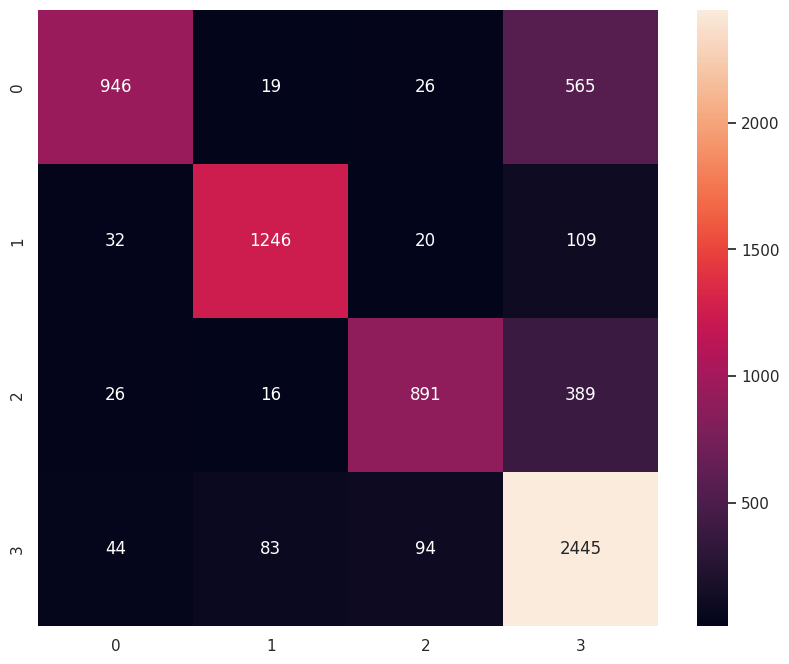

In [65]:
conf_mat_Ada = confusion_matrix(y_test_enc, y_pred_Ada)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat_Ada, annot=True, fmt='d')

In [66]:
acc = accuracy_score(y_test_enc, y_pred_Ada)
accuracy['AdaBoost'] = acc
acc

0.795281254495756

# Подведите общие итоги

In [67]:
for algo, result in accuracy.items():
    print(f"{algo:{20}}: Score: {result}, Training time: {training_time[algo]}, Prediction time: {prediction_time[algo]}")

CatBoost            : Score: 0.905337361530715, Training time: 1304.2078573703766, Prediction time: 1.1546483039855957
LGBM                : Score: 0.9346856567400375, Training time: 25.140989065170288, Prediction time: 1.03285551071167
XGBoost             : Score: 0.9259099410156812, Training time: 76.02102160453796, Prediction time: 0.8627290725708008
AdaBoost            : Score: 0.795281254495756, Training time: 13.036099672317505, Prediction time: 0.9667048454284668
